# Navigation

---

Congratulations for completing the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)!  In this notebook, you will learn how to control an agent in a more challenging environment, where it can learn directly from raw pixels!  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import time
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
#from torchvision import transforms
from collections import deque
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image 
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/VisualBanana.app"`
- **Windows** (x86): `"path/to/VisualBanana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/VisualBanana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/VisualBanana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/VisualBanana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `VisualBanana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="VisualBanana.app")
```

In [2]:
env = UnityEnvironment(file_name="VisualBanana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The environment state is an array of raw pixels with shape `(1, 84, 84, 3)`.  *Note that this code differs from the notebook for the project, where we are grabbing **`visual_observations`** (the raw pixels) instead of **`vector_observations`**.* A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

Number of agents: 1
Number of actions: 4
States look like:


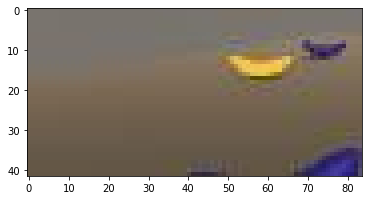

States have shape: (1, 42, 84, 3)


In [4]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
state=state[0, :,:,:]
#state = np.dot(state[42:,:,:3],[0.2989, 0.5870, 0.114])#[0.2989, 0.5870, 0.114]
state = state[None,42:,:,:3]

print('States look like:')
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print('States have shape:', state.shape)
#print('States have shape:', state2.shape)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.visual_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.visual_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [5]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from dqn_agent_pixel import Agent_pixel

calculation with: cuda:0


In [7]:
agent = Agent_pixel(state_size=3, action_size=action_size, seed=0) # state_size=3 for RGB |state_size=1 for gray scale

In [8]:
def prep_img(img):
    img = img[:,42:,:,:3]                                   #for RGB
    #img =np.dot(img[:, 42:,:,:3],[0.2989, 0.5870, 0.1140]) # for gray scale
    img = np.moveaxis(img, 3, 1)
    return img

def pass_frame(next_state,frame0,frame1,frame2,frame3):
    next_state[0,:,0, :, :] = frame0
    if not(frame1 is None):
        next_state[0,:,1, :, :] = frame1
    if not(frame2 is None):
        next_state[0,:,2, :, :] = frame2
    if not (frame3 is None):
        next_state[0,:,3, :, :] = frame3
    frame3 = frame2
    frame2 = frame1
    frame1 = frame0
    return next_state, frame0, frame1, frame2, frame3

In [9]:
def train(n_episodes=1500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    start_training = time.time()
    print('Training started: {}' .format(time.asctime(time.localtime(time.time()))))
    scores = []                                            # list containing scores from each episode
    scores_window = deque(maxlen=100)                      # last 100 scores
    eps = eps_start                                        # initialize epsilon
    
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        frame0 = env_info.visual_observations[0]
        frame0 = prep_img(frame0)
        frame_size = frame0.shape  # 1,3,42,84  
        nframes=4
        state = np.zeros((frame_size[0],frame_size[1],nframes, frame_size[2], frame_size[3]))
        next_state = np.zeros((frame_size[0],frame_size[1],nframes, frame_size[2], frame_size[3]))
        state[0,:,0, :, :] = frame0
        frame1, frame2, frame3  = None, None, None
        score = 0
        
        for t in range(max_t):
            #print(state.shape)
            action = agent.act(state, eps).astype(int)     # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            frame0 = env_info.visual_observations[0]
            frame0 = prep_img(frame0)
            next_state, frame0, frame1, frame2, frame3 = pass_frame(next_state,frame0,frame1,frame2,frame3)
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward                                # update the score
                   
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            time_elapsed = time.time() - start_training
            time_elapsed_str = time.strftime('%Hh%Mm%Ss', time.gmtime(time_elapsed))
            print('\rEpisode {}\tAverage Score: {:.2f} \ttime since start: {}'.format(i_episode, np.mean(scores_window),time_elapsed_str))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_pixels.pth')
                        
        if np.mean(scores_window)>=15.0:
            time_elapsed = time.time() - start_training
            time_elapsed_str = time.strftime('%Hh%Mm%Ss', time.gmtime(time_elapsed))
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f} \ttime since start: {}'.format(i_episode-100, np.mean(scores_window),time_elapsed_str))
            print('Training finished: {}' .format(time.asctime(time.localtime(time.time()))))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_pixels.pth')
            break
    return scores

In [10]:
scores = train()

Training started: Sun Mar 15 13:17:13 2020
Episode 100	Average Score: -0.07 	time since start: 00h12m18s
Episode 200	Average Score: -0.04 	time since start: 00h24m45s
Episode 300	Average Score: -0.04 	time since start: 00h37m24s
Episode 400	Average Score: -0.01 	time since start: 00h50m09s
Episode 500	Average Score: 0.36 	time since start: 01h03m02s
Episode 600	Average Score: 0.02 	time since start: 01h15m59s
Episode 700	Average Score: 0.10 	time since start: 01h29m05s
Episode 800	Average Score: 0.00 	time since start: 01h42m09s
Episode 900	Average Score: 0.23 	time since start: 01h55m20s
Episode 1000	Average Score: -0.12 	time since start: 02h08m34s
Episode 1100	Average Score: 0.16 	time since start: 02h21m55s
Episode 1200	Average Score: 0.18 	time since start: 02h35m13s
Episode 1300	Average Score: -0.18 	time since start: 02h48m32s
Episode 1400	Average Score: -0.28 	time since start: 03h02m52s
Episode 1500	Average Score: -0.12 	time since start: 03h16m38s


### Training plot

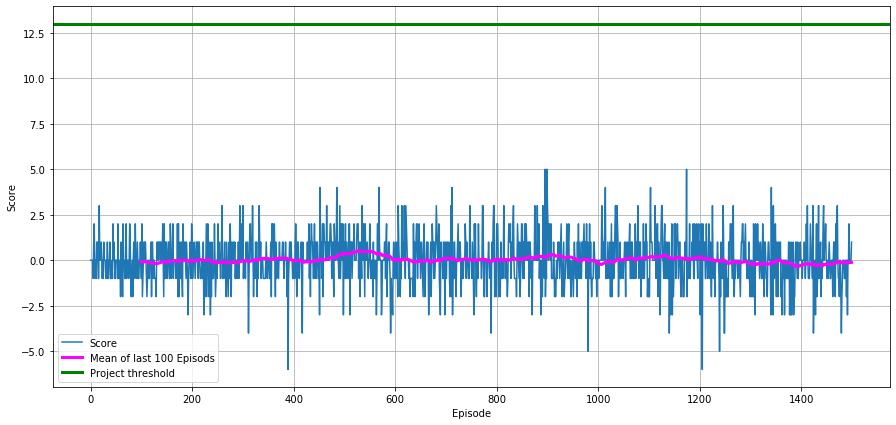

In [11]:
# plot the scores
fig = plt.figure(figsize=[15, 7])
ax = fig.add_subplot(111)

scores_mean = pd.Series(scores).rolling(100).mean()
plt.plot(np.arange(len(scores)), scores)
plt.plot(scores_mean, "-", c="magenta", linewidth=3)
plt.axhline(13, c="green", linewidth=3)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.grid(which="major")
plt.legend(["Score", "Mean of last 100 Episods", "Project threshold"])
plt.show()

### Watch the trained agent 

In [12]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_pixels.pth'))

<All keys matched successfully>

In [13]:
for i in range (3):
    env_info = env.reset(train_mode=False)[brain_name]
    frame0 = env_info.visual_observations[0]
    frame0 = prep_img(frame0)
    frame_size = frame0.shape  # 1,3,84,84  
    nframes=4
    state = np.zeros((frame_size[0],frame_size[1],nframes, frame_size[2], frame_size[3]))
    next_state = np.zeros((frame_size[0],frame_size[1],nframes, frame_size[2], frame_size[3]))
    state[0,:,0, :, :] = frame0
    frame1, frame2, frame3  = None, None, None
    score = 0
    for j in range(100):
        action = agent.act(state).astype(int)     # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        frame0 = env_info.visual_observations[0]
        frame0 = prep_img(frame0)
        next_state, frame0, frame1, frame2, frame3 = pass_frame(next_state,frame0,frame1,frame2,frame3)
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward          
        
        if done:                                       # exit loop if episode finished
            break
           

In [14]:
env.close()